Exploratory Data Analysis for Microsoft Time-Series Dataset
This notebook performs a thorough exploratory data analysis (EDA) of a time‑series dataset that combines Microsoft stock prices with Reddit and news sentiment metrics. The objectives are:
1. Understand the structure and quality of the dataset.
2. Explore temporal patterns in price, volume, and sentiment.
3. Identify relationships between sentiment and market performance.
4. Surface any anomalies, trends, or seasonality that may inform downstream modeling.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Stats / TS analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot, autocorrelation_plot

# Config
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
sns.set_style('whitegrid')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [2]:
DATA_PATH = '../../data/merged-data/microsoft-merged.csv'

In [3]:
data = pd.read_csv(DATA_PATH)
print(f'Shape: {data.shape}')
data.head()

Shape: (327, 16)


,Date,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score
0,2025-01-02,423.9003,424.4382,413.2612,416.9769,"16,896,500.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-03,419.4673,422.4060,417.9332,421.7286,"16,662,900.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-06,426.3608,432.6566,423.8504,426.2114,"20,573,600.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-07,427.3570,429.0006,419.1884,420.7523,"18,139,100.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-08,421.8382,425.3348,419.9256,422.9340,"15,054,600.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               327 non-null    object 
 1   Open               327 non-null    float64
 2   High               327 non-null    float64
 3   Low                327 non-null    float64
 4   Close              327 non-null    float64
 5   Volume             327 non-null    float64
 6   author             172 non-null    object 
 7   score              172 non-null    float64
 8   subreddit          172 non-null    object 
 9   tickers_mentioned  327 non-null    object 
 10  clean_text         172 non-null    object 
 11  compound           172 non-null    float64
 12  sentiment          172 non-null    object 
 13  cleaned_headline   236 non-null    object 
 14  sentiment_news     236 non-null    object 
 15  sentiment_score    236 non-null    float64
dtypes: float64(8), object(8)
m

None

In [6]:
display(data.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,327,102,2025-05-16,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,327.0000,NaN,NaN,NaN,440.1266,26.6997,350.2370,432.9903,452.0500,455.5900,461.5500
High,327.0000,NaN,NaN,NaN,443.7782,25.7988,363.8121,439.3135,454.3600,460.2500,462.5200
Low,327.0000,NaN,NaN,NaN,437.1661,27.4885,344.1582,430.8490,448.9100,454.3200,456.9300
Close,327.0000,NaN,NaN,NaN,440.8619,26.6472,353.9103,436.3689,454.2700,457.3600,460.6900
Volume,327.0000,NaN,NaN,NaN,"21,556,973.3945","6,639,346.5930","13,766,800.0000","17,086,300.0000","19,902,800.0000","23,849,800.0000","58,938,100.0000"
author,172,12,breakyourteethnow,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,172.0000,NaN,NaN,NaN,181.3547,492.4560,0.0000,10.0000,14.0000,26.0000,"1,762.0000"
subreddit,172,3,stocks,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tickers_mentioned,327,1,MSFT,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').set_index('Date')

In [8]:
# Forward fill numeric columns if small gaps, else leave for modeling
data[['Open','High','Low','Close','Volume']] = data[['Open','High','Low','Close','Volume']].ffill()

In [9]:
# Create a daily return column
data['Return'] = data['Close'].pct_change()

In [10]:
missing_after = data.isna().sum().sort_values(ascending=False)
print('Missing after preprocessing:')
display(missing_after[missing_after > 0])

Missing after preprocessing:


author              155
score               155
subreddit           155
clean_text          155
compound            155
sentiment           155
cleaned_headline     91
sentiment_news       91
sentiment_score      91
Return                1
dtype: int64

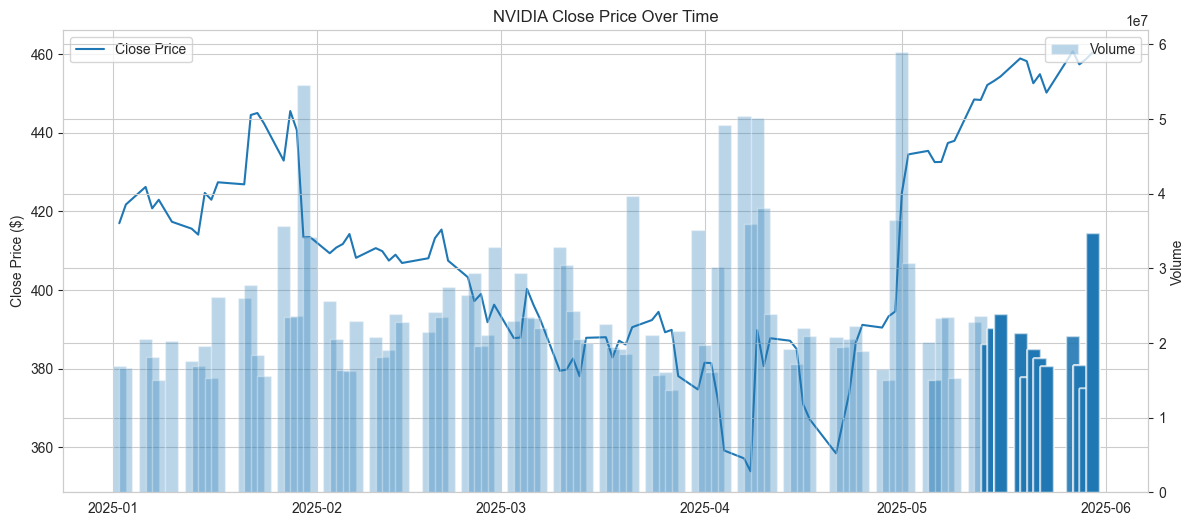

In [11]:
fig, ax1 = plt.subplots(figsize = (14,6))
ax1.plot(data.index, data['Close'], label = 'Close Price')
ax1.set_ylabel('Close Price ($)')
ax1.set_title('NVIDIA Close Price Over Time')
ax1.legend(loc = 'upper left')

# Secondary axis for volume
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha = 0.3, label = 'Volume', width = 2)
ax2.set_ylabel('Volume')
ax2.legend(loc = 'upper right')
plt.show()

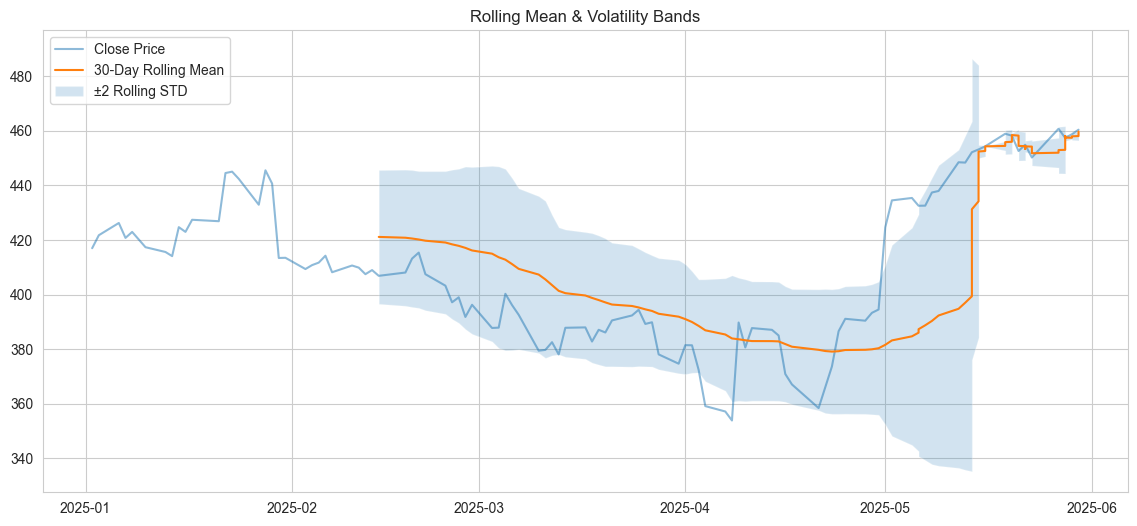

In [12]:
window = 30  # 30 trading days ~ 1.5 months
rolling_mean = data['Close'].rolling(window).mean()
rolling_std = data['Close'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean')
plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2, label='±2 Rolling STD')
plt.title('Rolling Mean & Volatility Bands')
plt.legend()
plt.show()

In [13]:
data

,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score,Return
Date,,,,,,,,,,,,,,,,
2025-01-02,423.9003,424.4382,413.2612,416.9769,"16,896,500.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,419.4673,422.4060,417.9332,421.7286,"16,662,900.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,0.0114
2025-01-06,426.3608,432.6566,423.8504,426.2114,"20,573,600.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,0.0106
2025-01-07,427.3570,429.0006,419.1884,420.7523,"18,139,100.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,-0.0128
2025-01-08,421.8382,425.3348,419.9256,422.9340,"15,054,600.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,0.0052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,459.7200,461.6800,455.5400,460.3600,"34,770,500.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,a 9 dividend to ride out the us debt downgrade,positive,0.8841,0.0000
2025-05-30,459.7200,461.6800,455.5400,460.3600,"34,770,500.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,c3ai eyes 47 billion agentic ai market by 2030...,positive,0.7274,0.0000
2025-05-30,459.7200,461.6800,455.5400,460.3600,"34,770,500.0000",NaN,NaN,NaN,MSFT,NaN,NaN,NaN,tesla block ride bitcoin boom as microstrategy...,neutral,0.8401,0.0000


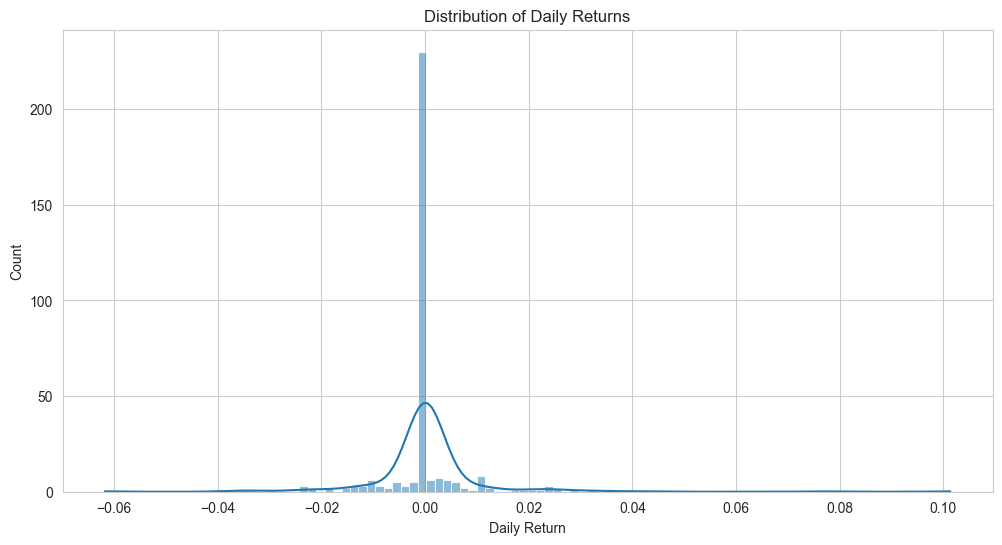

count   326.0000
mean      0.0004
std       0.0113
min      -0.0618
1%       -0.0326
5%       -0.0131
25%       0.0000
50%       0.0000
75%       0.0000
95%       0.0117
99%       0.0338
max       0.1013
Name: Return, dtype: float64

In [14]:
sns.histplot(data['Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# Tail analysis
data['Return'].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])

In [15]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = dict(zip(labels, result[:4]))
    for key, value in out.items():
        print(f'{key}: {value}')
    for key, val in result[4].items():
        print(f'Critical Value {key}: {val}')
    print('---')

adf_test(data['Close'], 'Close Price')
adf_test(data['Return'], 'Return')

Augmented Dickey-Fuller Test: Close Price
ADF Statistic: -1.9333222214954353
p-value: 0.3165512544310397
# Lags Used: 15
Number of Observations Used: 311
Critical Value 1%: -3.451552879535732
Critical Value 5%: -2.8708786756338407
Critical Value 10%: -2.571745666091128
---
Augmented Dickey-Fuller Test: Return
ADF Statistic: -3.640561514234651
p-value: 0.005031282854776554
# Lags Used: 16
Number of Observations Used: 309
Critical Value 1%: -3.45169128009473
Critical Value 5%: -2.8709394227049154
Critical Value 10%: -2.5717780602423517
---


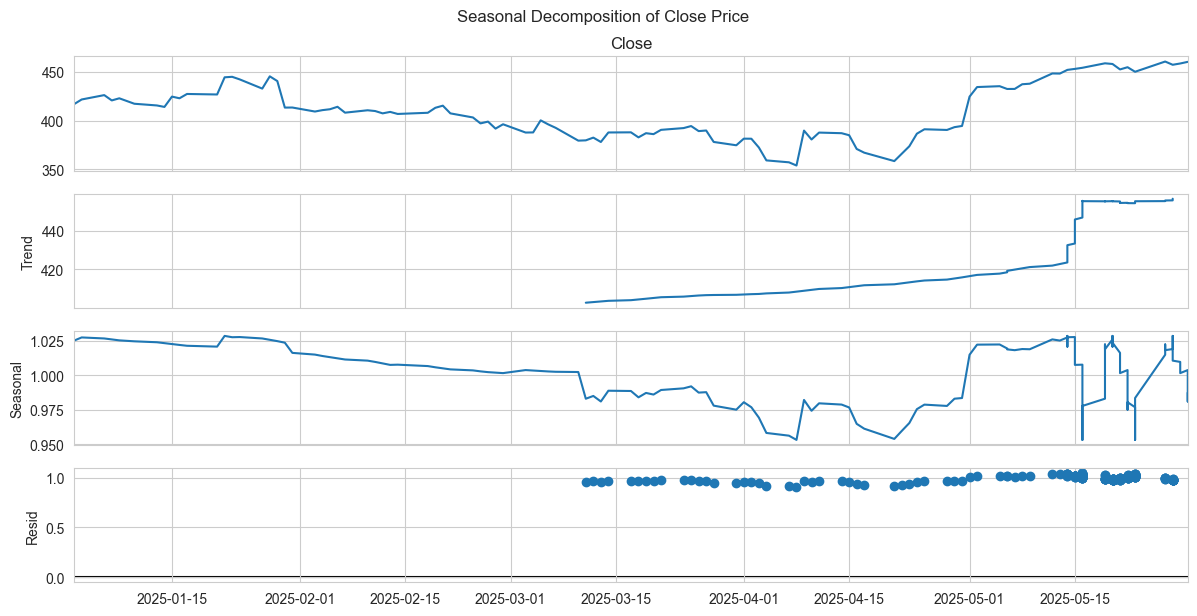

In [17]:
# Decompose with multiplicative model (price often multiplicative)
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=90)

decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Price', y = 1.02)
plt.show()

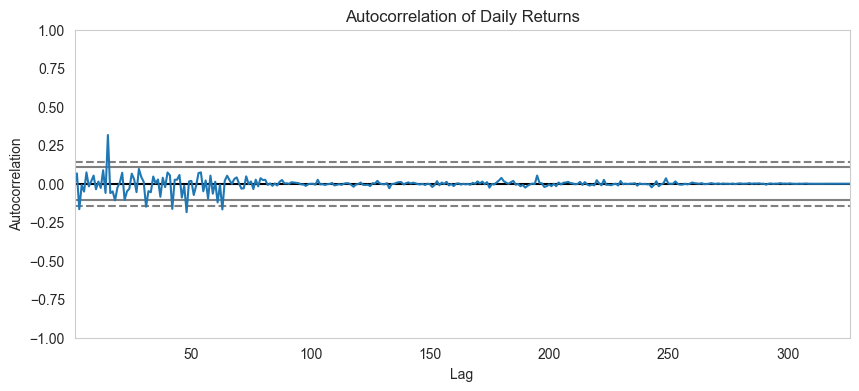

In [18]:
plt.figure(figsize=(10,4))
autocorrelation_plot(data['Return'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.show()

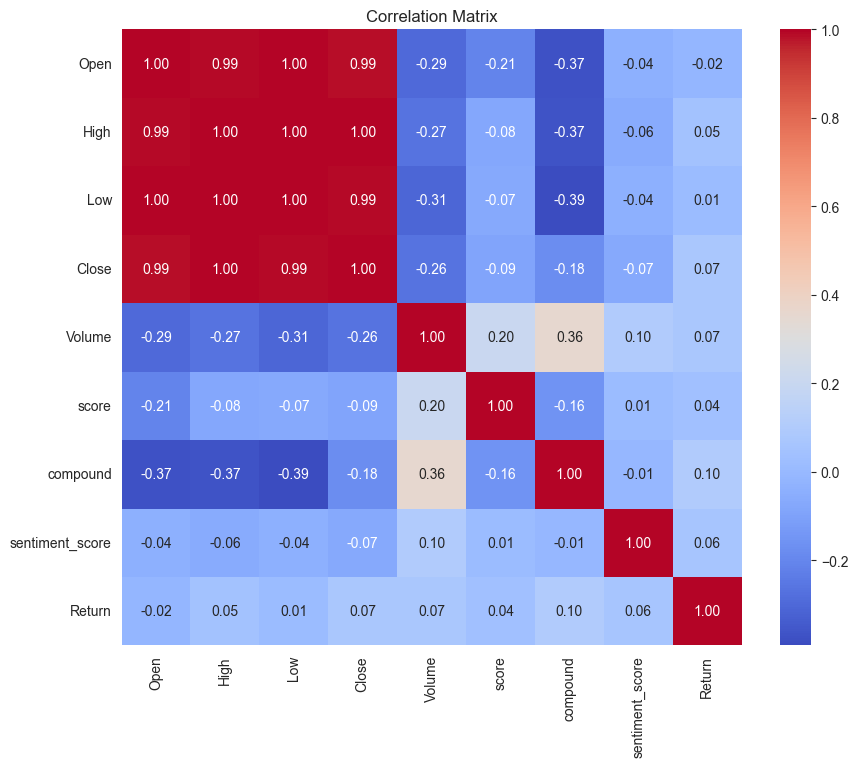

In [19]:
# Select numeric columns for correlation
num_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# How many duplicates do I have?
dupes = data.index.duplicated(keep=False).sum()
print(f"Duplicate index rows: {dupes}")

# Quickly inspect a few of them
print(data.index[data.index.duplicated()].unique()[:10])


Duplicate index rows: 238
DatetimeIndex(['2025-05-06', '2025-05-14', '2025-05-15', '2025-05-16',
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-27'],
              dtype='datetime64[ns]', name='Date', freq=None)


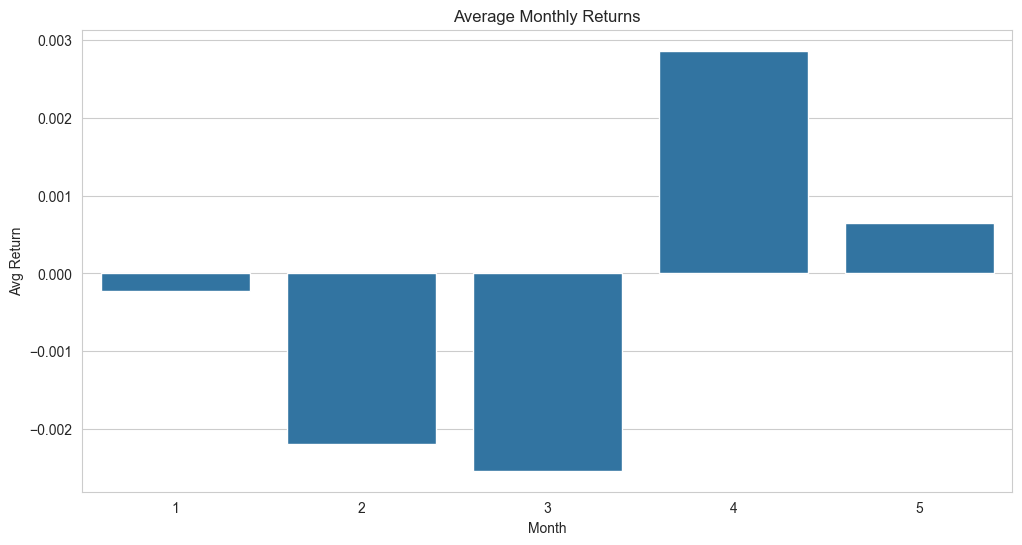

In [24]:
# Monthly seasonality
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Return'].mean()

sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Avg Return')
plt.show()

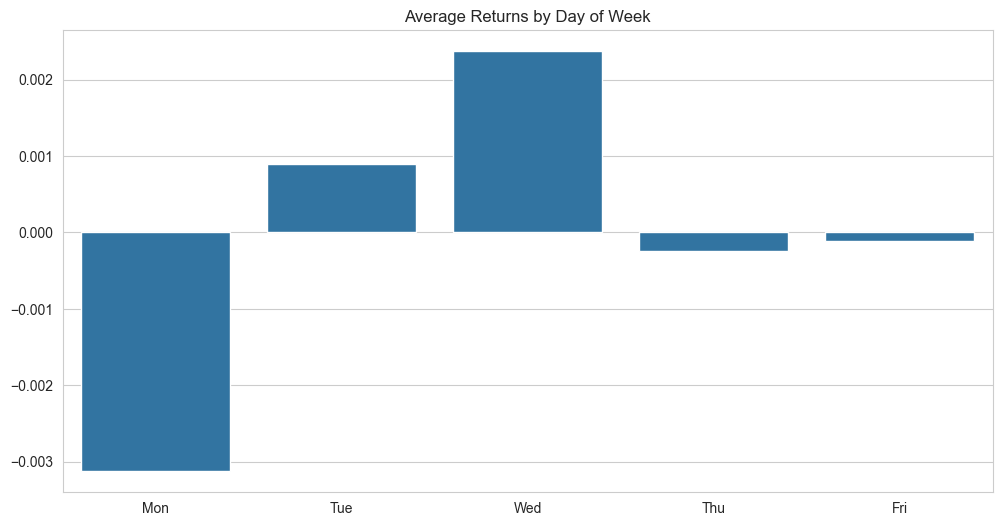

In [25]:
# Day of week effect
data['DayOfWeek'] = data.index.dayofweek  # 0=Monday
dow_avg = data.groupby('DayOfWeek')['Return'].mean()

sns.barplot(x=['Mon','Tue','Wed','Thu','Fri'], y=dow_avg.values)
plt.title('Average Returns by Day of Week')
plt.show()